In [148]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import math
import operator
%matplotlib inline

# Практическое задание 8

## Задание 1
Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже. Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

In [149]:
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница']
street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

np.corrcoef(street, garage)[0, 1]

-0.9999999999999998

Коэффициент равен -1, следует, корреляция отрицательная.

## Задание 2
Построить диаграмму рассеяния.

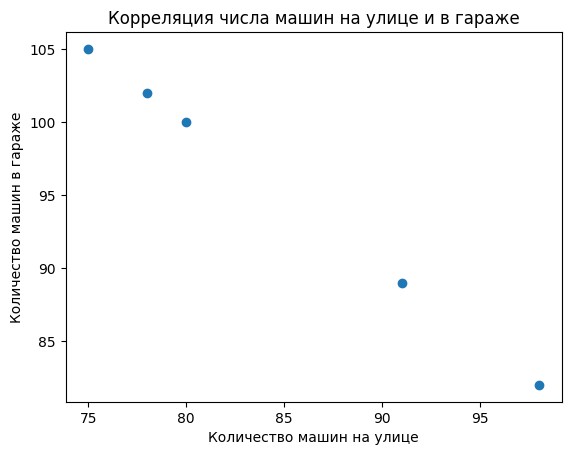

In [150]:
plt.title("Корреляция числа машин на улице и в гараже")
plt.xlabel('Количество машин на улице')
plt.ylabel('Количество машин в гараже')
plt.scatter(street, garage, marker='o')
plt.show()

## Задание 3
Загрузить bitcoin.csv.

In [151]:
df = pd.read_csv("data/bitcoin.csv")
df = df.drop(columns=df.columns[0])
df

,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...
1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


## Задание 4
Скрыть последние 14 дней.

In [152]:
df = df.sort_values(by='time')
df.head(3)

,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03


In [153]:
df.nunique()

time          2001
high          1993
low           1994
open          1999
volumefrom    2001
volumeto      2001
close         1999
dtype: int64

Супер! Все значения уникальные в колонке time

In [154]:
last_values = df.tail(14)
new_df = df.head(df.shape[0]-14)
new_df

,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...
1982,2021-05-24,39945.35,34467.32,34716.84,106765.14,3.981461e+09,38837.76
1983,2021-05-25,39842.90,36509.09,38837.76,66530.67,2.529569e+09,38387.36
1984,2021-05-26,40854.81,37855.81,38387.36,66483.59,2.607760e+09,39295.08
1985,2021-05-27,40408.95,37211.84,39295.08,46474.62,1.804037e+09,38538.84


In [155]:
new_df.shape

(1987, 7)

## Задания 5-7
Предсказать стоимость криптовалюты за последние 14 дней с помощью линейной регрессии. Вывести угол наклона и y-перехват. Построить диаграмму.

In [156]:
class Model:
    def __init__(self, input_values: pd.DataFrame, output_values: pd.DataFrame):
        self.X = input_values
        self.y = output_values
        self.regression = LinearRegression().fit(self.X, self.y)

    def __call__(self, *args, **kwargs):
        return self.regression

    def show_coef(self):
        print(f"Наклон линии регрессии: {self.regression.coef_}\n"
              f"y-перехват: {self.regression.intercept_}\n"
              f"Качество модели: {self.regression.score(self.X, self.y)}")

    def plot_figure(self):
        plt.scatter(X,y, alpha=0.5, edgecolors='green')
        plt.plot(X, self.regression.predict(X), color='red', linewidth=3)
        plt.xlabel(X.columns[0])
        plt.ylabel(y.columns[0])
        plt.title(f"Зависимость {y.columns[0]} от {X.columns[0]}")
        plt.show()

    def predict_values(self, x_values: pd.DataFrame, y_real: pd.DataFrame):
        y_predicted = pd.DataFrame(self.regression.predict(x_values), columns=["Predicted"])
        fig, ax = plt.subplots()
        ax.plot(X, self.regression.predict(X), color='gray', linewidth=1)
        ax.scatter(x_values, y_real, edgecolors='green', label='реальные значения')
        ax.scatter(x_values, y_predicted, edgecolors='red', label='предсказанные значения')

        legend = ax.legend(loc='upper right', fontsize='x-small')
        legend.get_frame()
        plt.xlabel(X.columns[0])
        plt.ylabel(y.columns[0])
        plt.title(f"Модель {X.columns[0]}")
        plt.show()

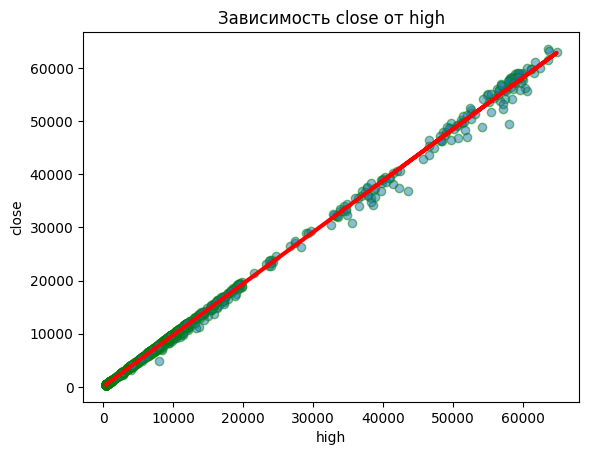

Наклон линии регрессии: [[0.96795709]]
y-перехват: [34.85836726]
Качество модели: 0.9986152452717557


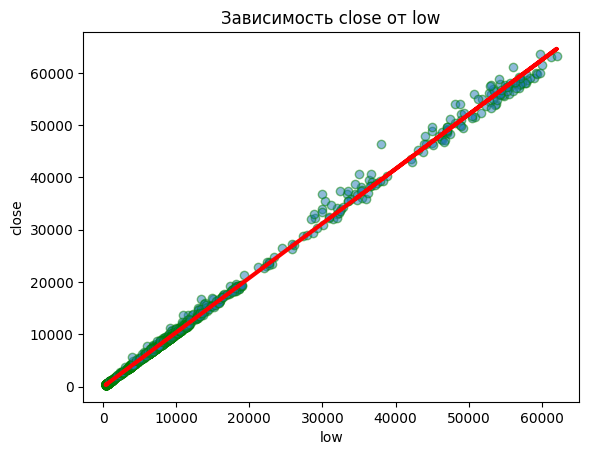

Наклон линии регрессии: [[1.04145721]]
y-перехват: [-29.20792888]
Качество модели: 0.9982527035925023


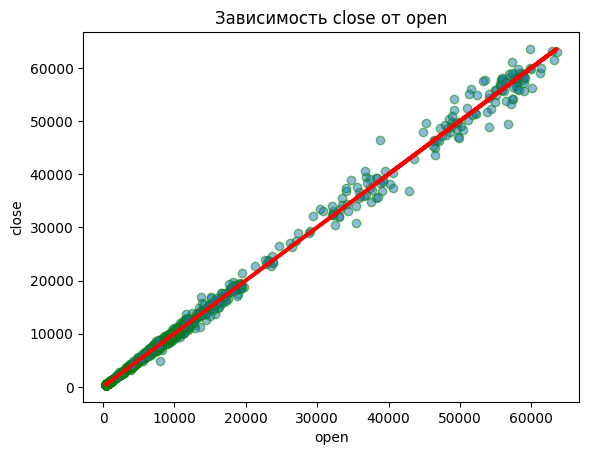

Наклон линии регрессии: [[0.99948228]]
y-перехват: [22.47357458]
Качество модели: 0.9968616304969795


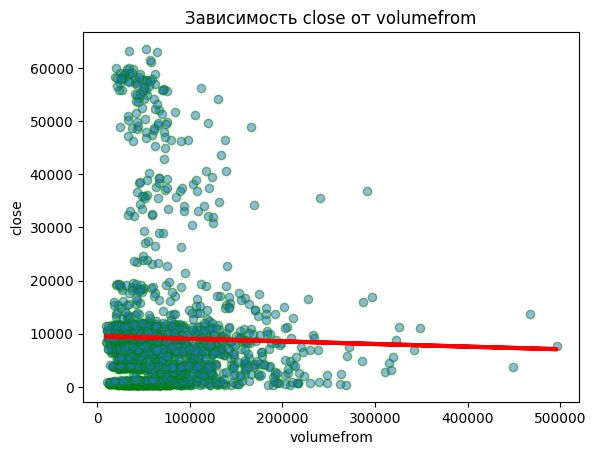

Наклон линии регрессии: [[-0.0049484]]
y-перехват: [9548.20323328]
Качество модели: 0.00042815814164609556


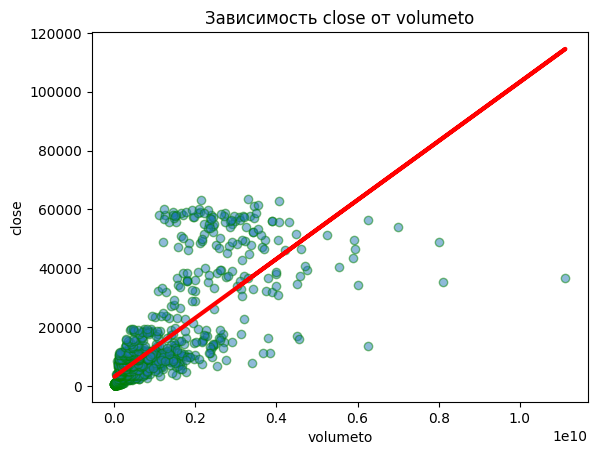

Наклон линии регрессии: [[1.00212827e-05]]
y-перехват: [3084.71609723]
Качество модели: 0.5856252621667589


In [157]:
for i in range(1, 6):
    X = pd.DataFrame(new_df, columns=[new_df.columns[i]])
    y = pd.DataFrame(new_df, columns=[new_df.columns[6]])
    model = Model(input_values=X, output_values=y)
    model.plot_figure()
    model.show_coef()

Таким образом, мы выяснили, по каким данным можно выстроить зависимость. Предскажем значения

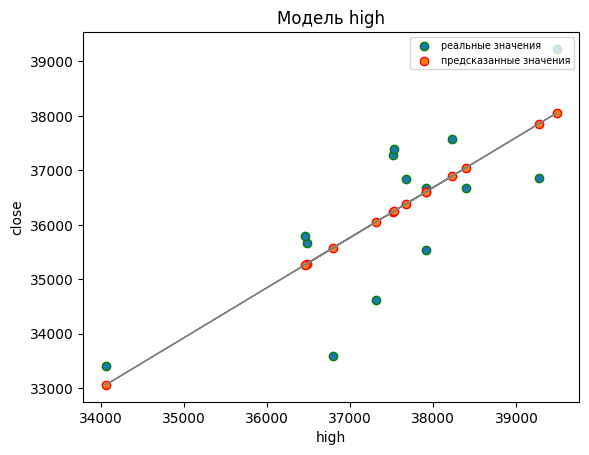

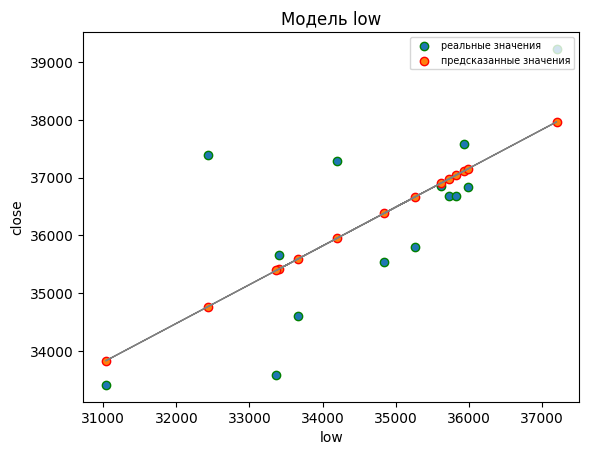

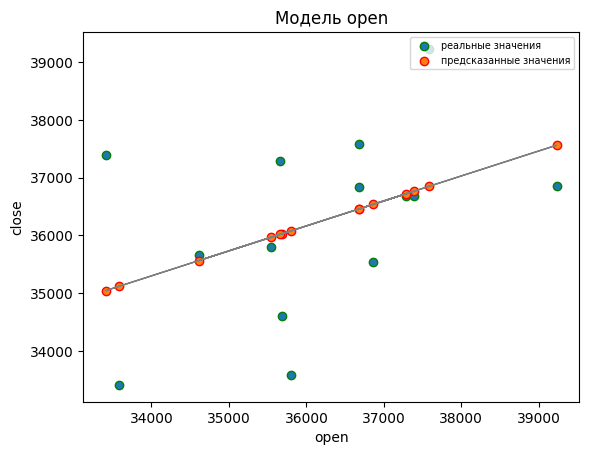

In [158]:
for i in range(1, 4):
    X = pd.DataFrame(last_values, columns=[last_values.columns[i]])
    y = pd.DataFrame(last_values, columns=[last_values.columns[6]])
    model = Model(input_values=X, output_values=y)
    model.predict_values(x_values=X, y_real=y)

## Задание 8
Загрузить housePrice.csv

In [159]:
df = pd.read_csv("data/housePrice.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


## Задание 9
Произвести предобработку.

In [160]:
df = df.dropna()
df = pd.DataFrame(df, columns=['Area', 'Price(USD)']).reset_index(drop=True)
for i in range(len(df['Area'])):
    df['Area'][i] = int((df['Area'][i]).replace(",", ""))
df

C:\Users\orono\AppData\Local\Temp\ipykernel_21392\2769043409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'][i] = int((df['Area'][i]).replace(",", ""))


,Area,Price(USD)
0,63,61666.67
1,60,61666.67
2,79,18333.33
3,95,30083.33
4,123,233333.33
...,...,...
3451,86,116666.67
3452,83,226666.67
3453,75,12166.67
3454,105,186666.67


Посмотрим на выбросы

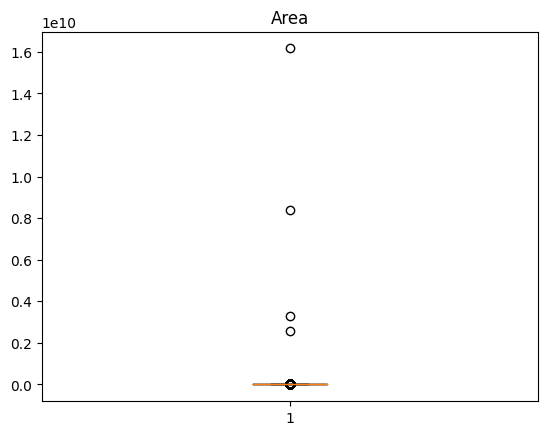

In [161]:
plt.boxplot(df['Area'])
plt.title('Area')
plt.show()

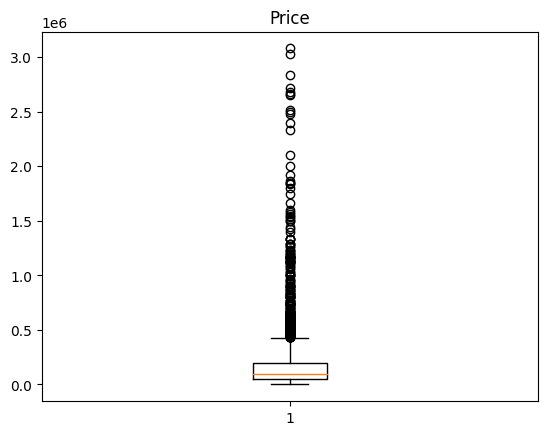

In [162]:
plt.boxplot(df['Price(USD)'])
plt.title('Price')
plt.show()

In [163]:
df = (df.loc[(df['Area'] < 0.2*10**10) & (df['Price(USD)'] < 2.2*10**6)]).reset_index(drop=True)

## Задания 10-12
Реализовать линейную регрессию вручную, без использования библиотеки.
Вывести угол наклона и y-перехват. Построить диаграмму

In [214]:
def processing(frame: pd.Series) -> list:
    frame = frame.values.tolist()
    for i in range(len(frame)):
        frame[i] = float(str(frame[i]).replace(",",''))
    return frame

class LinearRegressionModel:
    def __init__(self, input_values: pd.Series, output_values: pd.Series):
        self.X_name = input_values.name
        self.y_name = output_values.name
        self.X = processing(input_values)
        self.y = processing(output_values)
        self.m = self.calc_parameters()[0]
        self.c = self.calc_parameters()[1]
        self.r2 = self.calc_r2()

    def show_coef(self):
        print(f"Наклон линии регрессии: {self.m}\n"
              f"y-перехват: {self.c}\n"
              f"Качество модели: {self.r2}")

    def calc_parameters(self):
        # calculate mean
        mean_X = np.mean(self.X)
        mean_y = np.mean(self.y)

        # calculate m and c
        numer = 0
        denom = 0
        for i in range(len(self.X)):
            numer += (self.X[i] - mean_X) * (self.y[i] - mean_y)
            denom += (self.X[i] - mean_X) ** 2
        m = numer / denom
        c = mean_y - (m * mean_X)
        return m, c

    def plot_figure(self):
        # plotting values and regression line
        max_x = np.max(self.X) + 100
        min_x = np.min(self.y) - 100
        x = np.linspace(min_x, max_x, 100)
        y = self.c + self.m * x

        plt.plot(x, y, color='gray', label='Модель')
        plt.scatter(self.X, self.y, c='green', label='Реальные данные')

        plt.xlabel(f"{self.X_name}")
        plt.ylabel(f"{self.y_name}")
        plt.legend()
        plt.show()

    def calc_r2(self):
        ss_r = 0
        ss_t = 0

        for i in range(len(self.y)):
          y_pred = self.c + self.m * self.X[i]
          ss_r += (y_pred - np.mean(self.y)) ** 2
          ss_t += (self.y[i] - np.mean(self.y)) ** 2
        r2 = (ss_r/ss_t)
        return r2

    def __call__(self, *args, **kwargs):
        self.plot_figure()
        self.show_coef()

In [215]:
model = LinearRegressionModel(input_values=df['Area'], output_values=df['Price(USD)'])

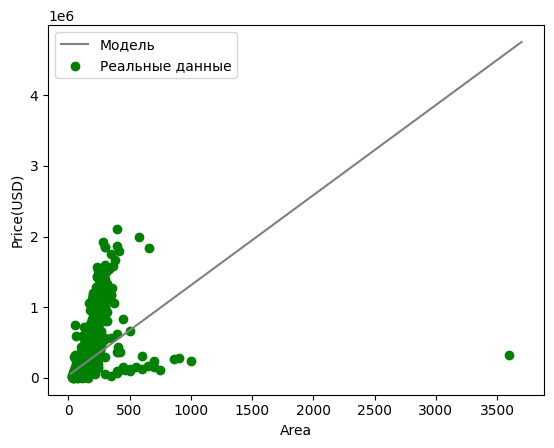

Наклон линии регрессии: 1275.343075167578
y-перехват: 34566.75304569438
Качество модели: 0.24569168397216837


In [216]:
model()

Проверим правильность через ранее составленный класс

In [204]:
X = pd.DataFrame(df, columns=['Area'])
y = pd.DataFrame(df, columns=['Price(USD)'])
model = Model(input_values=X, output_values=y)

In [205]:
model.show_coef()

Наклон линии регрессии: [[1275.34307517]]
y-перехват: [34566.75304569]
Качество модели: 0.24569168397216778


Ура! Все сделано верно!